<a href="https://colab.research.google.com/github/saubhagyav/Book_Recommendation_System/blob/main/Individual_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [ ]:
# Importing Libraries:- 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Paths of the datasets provided to me.
user = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Users.csv'
books = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Books.csv'
ratings = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Ratings.csv'

In [ ]:
df_user = pd.read_csv(user)
df_books = pd.read_csv(books)
df_ratings = pd.read_csv(ratings)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Informations about the 3 datasets provided to us for this project:-**
## The Book-Crossing dataset comprises 3 files.

## **1. Users** 

### Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

## **2. Books**

### Books are identified by their respective ISBN. Invalid ISBNs have already been removedfrom the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

## **3. Ratings**

### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [ ]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
df_user.shape

(278858, 3)

In [ ]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df_books.shape

(271360, 8)

In [ ]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
df_ratings.shape

(1149780, 3)

# **Dropping Insignificant Columns from df_books :-**

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis

df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
df_books.shape

(271360, 5)

# **Calculating the number of null values in the three Datasets:-**

In [ ]:
df_user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# **EDA on the Three Datasets:-** 

In [ ]:
df_ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Ratings')

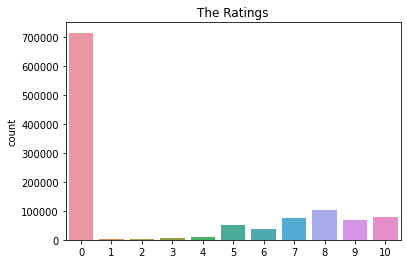

In [ ]:
sns.countplot(df_ratings['Book-Rating'].values).set_title('The Ratings')

# **Forming the Final Dataset by merging the above three Datasets:-** 

In [ ]:
df_new = pd.merge(df_user, df_ratings, how='inner', on='User-ID')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [ ]:
df_new.shape

(1149780, 5)

In [ ]:
df_new = df_new.merge(df_books, on='ISBN')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [ ]:
df_new.shape

(1031136, 9)

In [ ]:
df_new['Age'].isnull().sum()

277835

In [ ]:
df_new.drop(columns=['ISBN',	'Book-Author',	'Year-Of-Publication',	'Publisher','Age','Location'], inplace=True)

In [ ]:
df_new.head()

,User-ID,Book-Rating,Book-Title
0,2,0,Classical Mythology
1,8,5,Clara Callan
2,11400,0,Clara Callan
3,11676,8,Clara Callan
4,41385,0,Clara Callan


In [ ]:
df_new.shape

(1031136, 3)

In [ ]:
df_new.isnull().sum()

User-ID        0
Book-Rating    0
Book-Title     0
dtype: int64

In [ ]:
df_new=df_new[df_new['Book-Rating']>0]

In [ ]:
df_new['Book-Title'].value_counts()

The Lovely Bones: A Novel                            707
Wild Animus                                          581
The Da Vinci Code                                    494
The Secret Life of Bees                              406
The Nanny Diaries: A Novel                           393
                                                    ... 
Building Global Security: Agenda for the 1990's        1
Bateson, Watzlawick und die Schule von Palo Alto.      1
Spirited Away 01. Chihiros Reise ins Zauberland        1
The Heart of Zen Cuisine                               1
Lady, Lady, I Did It!: An 87th Precinct Mystery        1
Name: Book-Title, Length: 135567, dtype: int64

In [ ]:
counts1 = df_new['Book-Title'].value_counts()
df1= df_new[df_new['Book-Title'].isin(counts1[counts1 > 8].index)].reset_index()
df1.drop(columns='index', inplace=True)

In [ ]:
df1

,User-ID,Book-Rating,Book-Title
0,8,5,Clara Callan
1,11676,8,Clara Callan
2,67544,8,Clara Callan
3,116866,9,Clara Callan
4,123629,9,Clara Callan
...,...,...,...
166775,276556,10,The Brothers K
166776,276563,10,The Cat Who Went to Heaven
166777,277157,5,Saving Faith
166778,277563,5,Last Man Standing


In [ ]:
len(df1['User-ID'].unique())

43684

In [ ]:
Books_counts = pd.DataFrame(df_new['Book-Title'].value_counts()).reset_index()
Books_counts.head()

,index,Book-Title
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393


In [ ]:
Books_counts[Books_counts['Book-Title'] == 1]

,index,Book-Title
47427,Cartas Contra LA Guerra,1
47428,Test Your Cat's Psychic Powers,1
47429,Wings of Fortune: Pirate's Gold (Crimson Skies),1
47430,Aufruhr in Oxford. Gaudy Night,1
47431,Not Dead Only Restin,1
...,...,...
135562,Building Global Security: Agenda for the 1990's,1
135563,"Bateson, Watzlawick und die Schule von Palo Alto.",1
135564,Spirited Away 01. Chihiros Reise ins Zauberland,1
135565,The Heart of Zen Cuisine,1


In [ ]:
len(df_new['Book-Title'].unique())

135567

In [ ]:
len(df1['Book-Title'].unique())

6515

In [ ]:
df_final = pd.pivot_table(data=df1, index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

In [ ]:
df_final

User-ID,8,9,16,17,19,26,32,39,42,44,51,53,56,69,73,75,78,81,85,91,92,97,99,114,125,129,165,169,178,183,185,202,224,226,228,230,232,242,243,244,...,278641,278645,278648,278652,278653,278659,278663,278668,278672,278683,278694,278698,278723,278724,278732,278740,278755,278760,278767,278773,278778,278782,278786,278798,278800,278807,278818,278820,278824,278828,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Selected Poems by E. E. Cummings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
len(df_final.iloc[0,:].values)

43684

In [ ]:
print(csr_matrix(df_final.iloc[0,:].values).shape)

(1, 43684)


In [ ]:
df_matrix = csr_matrix(df_final.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_final)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
# query_index = np.random.choice(df_final.shape[0])
# print(query_index)
query_index = 446
distances, indices = model_knn.kneighbors(df_final.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)

446


In [ ]:
# So the randomly selected user's book preferences are shown below
df_final.iloc[query_index,:]

User-ID
8         0.0
9         0.0
16        0.0
17        0.0
19        0.0
         ... 
278846    0.0
278849    0.0
278851    0.0
278852    0.0
278854    0.0
Name: Anne of the Island, Length: 43684, dtype: float64

In [ ]:
# This shows us the top 10 book indices that are closest to our randomly selected user.
indices.flatten()

array([ 446,  444,  447, 3715,  445, 3820,  440,  442, 1093, 1455])

In [ ]:
# This shows the distances of the corresponding closest recommendations for our randomly selected movie.
distances.flatten()

array([3.33066907e-16, 4.77583771e-01, 5.05804773e-01, 5.11652340e-01,
       5.12785783e-01, 5.20291935e-01, 5.24914082e-01, 7.21445643e-01,
       8.23401721e-01, 8.29005420e-01])

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'The Top 10 Recommendations for Users who have read book {df_final.index[query_index]} are shown below:-')
    else:
        print('{0}: {1}, with distance of {2}.'.format(i, df_final.index[indices.flatten()[i]], distances.flatten()[i]))

The Top 10 Recommendations for Users who have read book Anne of the Island are shown below:-
1: Anne of Ingleside (Anne of Green Gables Novels (Paperback)), with distance of 0.4775837705428825.
2: Anne's House of Dreams, with distance of 0.505804773436964.
3: Rainbow Valley (Anne of Green Gables Novels (Paperback)), with distance of 0.5116523397467208.
4: Anne of Windy Poplars (Anne of Green Gables Novels (Paperback)), with distance of 0.5127857829771736.
5: Rilla of Ingleside (Anne of Green Gables Novels (Paperback)), with distance of 0.5202919348791191.
6: Anne of Avonlea (Anne of Green Gables Novels (Paperback)), with distance of 0.5249140822598609.
7: Anne of Green Gables (Anne of Green Gables Novels (Paperback)), with distance of 0.7214456431565122.
8: Counterfeit Lady, with distance of 0.8234017205542076.
9: Dragondrums, with distance of 0.829005420418749.


In [ ]:
r1 = df_new[df_new['Book-Title']=='Anne of the Island']
r2 = df_new[df_new['Book-Title']=='Anne of Ingleside (Anne of Green Gables Novels (Paperback))']
r3 = df_new[df_new['Book-Title']=="Anne's House of Dreams"]

In [ ]:
r_compare_1 = r1.merge(r2,on='User-ID')

In [ ]:
r_compare_1

,User-ID,Book-Rating_x,Book-Title_x,Book-Rating_y,Book-Title_y
0,69389,8,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
1,81263,8,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
2,104636,9,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
3,122716,10,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
4,125203,9,Anne of the Island,9,Anne of Ingleside (Anne of Green Gables Novels...
5,138543,10,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
6,153662,10,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
7,230522,10,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
8,249862,10,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
9,263107,9,Anne of the Island,9,Anne of Ingleside (Anne of Green Gables Novels...


In [ ]:
r_compare_2 = r1.merge(r3,on='User-ID')
r_compare_2

,User-ID,Book-Rating_x,Book-Title_x,Book-Rating_y,Book-Title_y
0,69389,8,Anne of the Island,8,Anne's House of Dreams
1,81263,8,Anne of the Island,8,Anne's House of Dreams
2,92547,10,Anne of the Island,10,Anne's House of Dreams
3,104636,9,Anne of the Island,10,Anne's House of Dreams
4,122716,10,Anne of the Island,10,Anne's House of Dreams
5,125039,5,Anne of the Island,9,Anne's House of Dreams
6,125203,9,Anne of the Island,9,Anne's House of Dreams
7,138543,10,Anne of the Island,10,Anne's House of Dreams
8,153662,10,Anne of the Island,9,Anne's House of Dreams
9,230522,10,Anne of the Island,10,Anne's House of Dreams
